#  기초 EDA, 데이터 병합, 분석준비, 시각화 연습

- [1. 데이터의 기본 정보 파악하기](#1.-데이터의-기본-정보-파악하기)
    - [데이터의 크기, 데이터의 타입]
    - [데이터의 열 정보 탐색]
    - [데이터의 분포 탐색 : 결측치, 이상치에 대한 탐색]
- [2. 데이터 관계 정리 및 전처리](#2.-데이터-관계-정리-및-전처리)
    - [데이터 병합]
    - [결측 데이터 처리하기]
- [3. 데이터 시각화 연습](#3.-데이터-시각화-연습)
    - [scatter plot]
    - [box plot]
    - [hist plot]
    - [heatmap plot]
    
----

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_dir = "../dataset/"

# 1. 데이터의 기본 정보 파악하기

### [데이터의 크기 및 기본 정보]

----
#### *DataFrame, Series 살펴보기*

In [3]:
olist_customers_dataset = pd.read_csv(data_dir + "olist_customers_dataset.csv")

In [4]:
olist_customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
olist_customers_dataset.shape

(99441, 5)

In [6]:
olist_customers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [7]:
type(olist_customers_dataset)

pandas.core.frame.DataFrame

In [8]:
customer_series = olist_customers_dataset['customer_id']

In [9]:
customer_series

0        06b8999e2fba1a1fbc88172c00ba8bc7
1        18955e83d337fd6b2def6b18a428ac77
2        4e7b3e00288586ebd08712fdd0374a03
3        b2b6027bc5c5109e529d4dc6358b12c3
4        4f2d8ab171c80ec8364f7c12e35b23ad
                       ...               
99436    17ddf5dd5d51696bb3d7c6291687be6f
99437    e7b71a9017aa05c9a7fd292d714858e8
99438    5e28dfe12db7fb50a4b2f691faecea5e
99439    56b18e2166679b8a959d72dd06da27f9
99440    274fa6071e5e17fe303b9748641082c8
Name: customer_id, Length: 99441, dtype: object

In [10]:
type(customer_series)

pandas.core.series.Series

In [11]:
customer_series.index

RangeIndex(start=0, stop=99441, step=1)

In [12]:
customer_series.values

array(['06b8999e2fba1a1fbc88172c00ba8bc7',
       '18955e83d337fd6b2def6b18a428ac77',
       '4e7b3e00288586ebd08712fdd0374a03', ...,
       '5e28dfe12db7fb50a4b2f691faecea5e',
       '56b18e2166679b8a959d72dd06da27f9',
       '274fa6071e5e17fe303b9748641082c8'], dtype=object)

----
#### *여러 데이터셋 하나로 정리하기*

In [13]:
empty_df = pd.DataFrame(columns=['a', 'b', 'c', 'd'])
empty_df

,a,b,c,d


In [14]:
empty_df = empty_df.append({'a': 1, 'b': 9, 'c': 9, 'd': 2}, ignore_index=True)
empty_df = empty_df.append({'a': 0, 'b': 6, 'c': 1, 'd': 3}, ignore_index=True)

In [15]:
empty_df.head()

,a,b,c,d
0,1,9,9,2
1,0,6,1,3


In [16]:
info_df = pd.DataFrame(columns=['row_num', 'col_num', 'name', 'pk'])

def info_df_row(name, pk, file_name):
    temp_df = pd.read_csv(data_dir + file_name)
    return {'row_num': temp_df.shape[0], 'col_num': temp_df.shape[1], 'name': name, 'pk': pk}

In [17]:
info_df = info_df.append(info_df_row("customer_data", "customer_id", "olist_customers_dataset.csv"), ignore_index=True)
info_df = info_df.append(info_df_row("location_data", "geolocation_zip_code_prefix", "olist_geolocation_dataset.csv"), ignore_index=True)
info_df = info_df.append(info_df_row("order_data", "order_id", "olist_order_items_dataset.csv"), ignore_index=True)
info_df = info_df.append(info_df_row("payment_data", "order_id", "olist_order_payments_dataset.csv"), ignore_index=True)
info_df = info_df.append(info_df_row("review_data", "review_id", "olist_order_reviews_dataset.csv"), ignore_index=True)
info_df = info_df.append(info_df_row("shipping_data", "order_id", "olist_orders_dataset.csv"), ignore_index=True)
info_df = info_df.append(info_df_row("product_data", "product_id", "olist_products_dataset.csv"), ignore_index=True)
info_df = info_df.append(info_df_row("seller_data", "seller_id", "olist_sellers_dataset.csv"), ignore_index=True)
info_df = info_df.append(info_df_row("category_data", "product_category_name", "product_category_name_translation.csv"), ignore_index=True)

In [18]:
info_df

,row_num,col_num,name,pk
0,99441,5,customer_data,customer_id
1,1000163,5,location_data,geolocation_zip_code_prefix
2,112650,7,order_data,order_id
3,103886,5,payment_data,order_id
4,100000,7,review_data,review_id
5,99441,8,shipping_data,order_id
6,32951,9,product_data,product_id
7,3095,4,seller_data,seller_id
8,71,2,category_data,product_category_name


----
### [데이터의 열 정보 탐색]

----
#### *Categorical 열 정보 살펴보기*

In [19]:
olist_customers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [20]:
olist_customers_dataset.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [21]:
olist_customers_dataset.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [22]:
# transform to categorical feature
olist_customers_dataset = pd.DataFrame(olist_customers_dataset).astype('category')

In [23]:
olist_customers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   customer_id               99441 non-null  category
 1   customer_unique_id        99441 non-null  category
 2   customer_zip_code_prefix  99441 non-null  category
 3   customer_city             99441 non-null  category
 4   customer_state            99441 non-null  category
dtypes: category(5)
memory usage: 7.5 MB


In [24]:
# Using from_records
data = [{'col_1': 3, 'col_2': 'a'},
        {'col_1': 2, 'col_2': 'b'},
        {'col_1': 1, 'col_2': 'c'},
        {'col_1': 0, 'col_2': 'd'}]
pd.DataFrame.from_records(data).head()

,col_1,col_2
0,3,a
1,2,b
2,1,c
3,0,d


In [25]:
# nunique : number of unique category
olist_customers_dataset['customer_id'].nunique()

99441

In [29]:
unique_counts=pd.DataFrame.from_records([(col,olist_customers_dataset[col].nunique()) for col in olist_customers_dataset.columns],columns=["col_name","num_category"])
unique_counts

,col_name,num_category
0,customer_id,99441
1,customer_unique_id,96096
2,customer_zip_code_prefix,14994
3,customer_city,4119
4,customer_state,27


----
#### *object(str)으로 다시 변경*

In [32]:
# transform to categorical feature
olist_customers_dataset = pd.DataFrame(olist_customers_dataset).astype('str')

In [33]:
olist_customers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [34]:
olist_customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


----
### [데이터의 분포 탐색 : 결측치, 이상치에 대한 탐색]

----
#### *결측치 탐색*

In [35]:
olist_products_dataset = pd.read_csv(data_dir + "olist_products_dataset.csv")
olist_products_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [36]:
olist_products_dataset.shape

(32951, 9)

In [37]:
olist_products_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [38]:
# 열 단위 탐색
olist_products_dataset['product_category_name'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
32946    False
32947    False
32948    False
32949    False
32950    False
Name: product_category_name, Length: 32951, dtype: bool

In [39]:
# 열 단위 탐색
olist_products_dataset['product_category_name'].isnull().sum()

610

In [36]:
# 전체 단위 탐색
olist_products_dataset.isnull()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
32946,False,False,False,False,False,False,False,False,False
32947,False,False,False,False,False,False,False,False,False
32948,False,False,False,False,False,False,False,False,False
32949,False,False,False,False,False,False,False,False,False


In [40]:
# 전체 단위 탐색
olist_products_dataset.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

----
#### *결측치 처리 - dropna()*

In [41]:
olist_products_dataset['product_category_name'].nunique()

73

In [42]:
olist_products_dataset['product_category_name'].value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
casa_conforto_2                     5
fashion_roupa_infanto_juvenil       5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

In [40]:
olist_products_dataset['product_category_name'].value_counts()[-10:]

fraldas_higiene                                  12
moveis_colchao_e_estofado                        10
la_cuisine                                       10
portateis_cozinha_e_preparadores_de_alimentos    10
tablets_impressao_imagem                          9
fashion_roupa_infanto_juvenil                     5
casa_conforto_2                                   5
pc_gamer                                          3
seguros_e_servicos                                2
cds_dvds_musicais                                 1
Name: product_category_name, dtype: int64

In [43]:
olist_products_dataset = olist_products_dataset.dropna()

In [44]:
olist_products_dataset['product_category_name'].nunique()

73

----
#### *결측치 처리 - fillna()*

In [46]:
# olist_products_dataset = olist_products_dataset.fillna("some_value")

----
#### *이상치 탐색 및 처리*

In [47]:
olist_products_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


<AxesSubplot:>

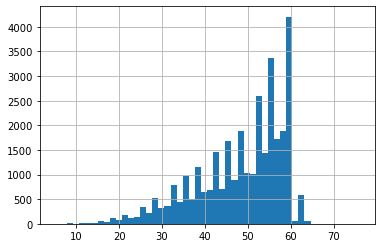

In [48]:
olist_products_dataset['product_name_lenght'].hist(bins=50)

<AxesSubplot:>

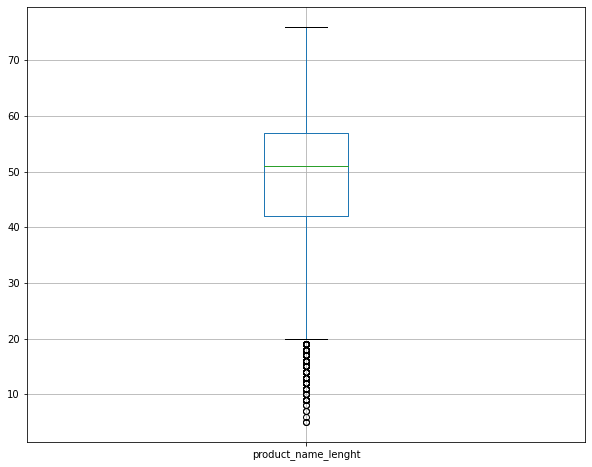

In [49]:
olist_products_dataset.boxplot(column=['product_name_lenght'],figsize=(10,8))

In [50]:
olist_products_dataset[olist_products_dataset['product_name_lenght'] < 20].shape

(290, 9)

<AxesSubplot:>

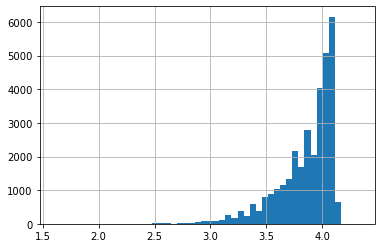

In [51]:
olist_products_dataset['product_name_lenght'] = np.log(olist_products_dataset['product_name_lenght'])
olist_products_dataset['product_name_lenght'].hist(bins=50)

<AxesSubplot:>

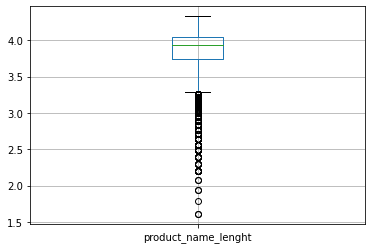

In [52]:
olist_products_dataset.boxplot(column=['product_name_lenght'])

In [52]:
olist_products_dataset[olist_products_dataset['product_name_lenght'] < 3.3].shape

(1366, 9)

----
#### *numerical 열 전체 탐색*

In [53]:
olist_products_dataset = pd.read_csv(data_dir + "olist_products_dataset.csv")
olist_products_dataset = olist_products_dataset.dropna()

In [54]:
numerical_columns = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

<AxesSubplot:>

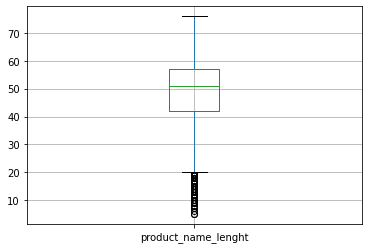

In [55]:
olist_products_dataset.boxplot(column=[numerical_columns[0]])

<AxesSubplot:>

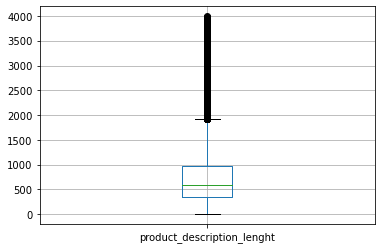

In [56]:
olist_products_dataset.boxplot(column=[numerical_columns[1]])

<AxesSubplot:>

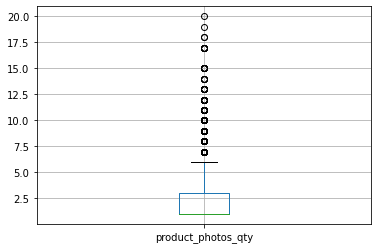

In [57]:
olist_products_dataset.boxplot(column=[numerical_columns[2]])

<AxesSubplot:>

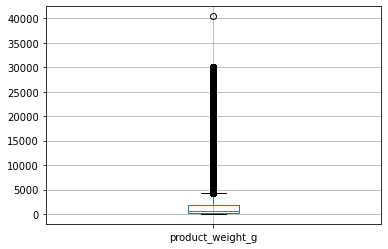

In [57]:
olist_products_dataset.boxplot(column=[numerical_columns[3]])

<AxesSubplot:>

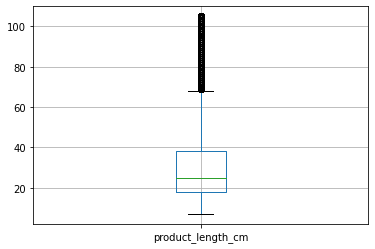

In [58]:
olist_products_dataset.boxplot(column=[numerical_columns[4]])

<AxesSubplot:>

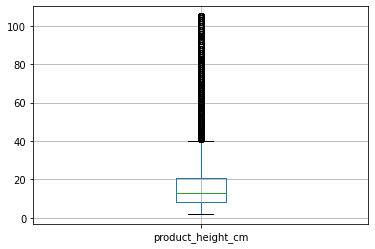

In [59]:
olist_products_dataset.boxplot(column=[numerical_columns[5]])

<AxesSubplot:>

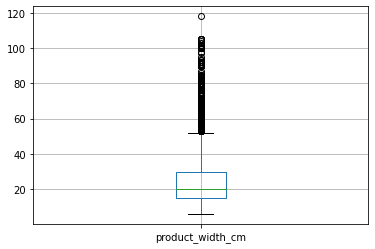

In [60]:
olist_products_dataset.boxplot(column=[numerical_columns[6]])

----

# 2. 데이터 관계 정리 및 전처리

----
### [데이터 병합]

#### *병합 대상 데이터 체크*

- 주문 데이터셋 뼈대 : olist_order_items_dataset
- 뼈대를 기본으로 부가 정보 병합

##### <다음주 실습 내용>
1. 시간대별 주문 데이터 분석
    - 시간대별 주문 분석 -> ***주문시간 정보 병합 필요***
    - 시간대별 주문 지역 분석 -> ***주문자 정보, 주문자의 거주 정보 병합 필요***
2. 주문 상품의 카테고리 분석
    - 주문 데이터에서 상품의 카테고리 비율 분석하기 -> ***상품의 카테고리 정보 병합 필요***
    - 시간대별 주문 상품 카테고리 분석 (ex. 밤에 많이 사는 상품군) -> ***주문시간 정보 + 상품의 카테고리 정보 병합 필요***
    - 일자/요일별 주문 상품 카테고리 분석 (ex. 일요일에 많이 사는 상품군) -> ***주문시간 정보 + 상품의 카테고리 정보 병합 필요***
3. 배송 데이터 분석
    - 평균 배송 시간 분석 -> ***배송 정보 병합 필요***
    - 지역에 따른 배송 시간 분석 -> ***주문자 정보, 주문자의 거주 정보, 배송 정보 병합 필요***
    - 예상 배송일과 실제 배송일간의 차이 분석 -> ***배송 정보 병합 필요***
    - 상품 카테고리별 평균 배송 시간 분석 -> ***상품의 카테고리 정보, 배송 정보 병합 필요***

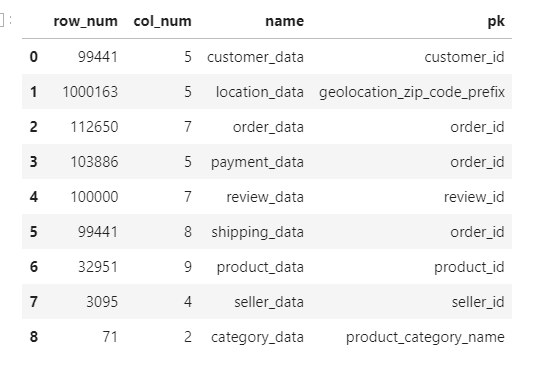

In [63]:
order_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [62]:
order_df = pd.read_csv(data_dir + "olist_order_items_dataset.csv")  # 뼈대 데이터
order_df.head() 

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [64]:
shipping_df = pd.read_csv(data_dir + "olist_orders_dataset.csv")  # 주문시간 및 배송 관련 정보
shipping_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [65]:
category_df = pd.read_csv(data_dir + "olist_products_dataset.csv")  # 상품 카테고리 정보
category_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [66]:
user_df = pd.read_csv(data_dir + "olist_customers_dataset.csv")  # 주문자 정보, 주문자의 거주 정보
user_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


----
#### 참고 : *LEFT JOIN 형태로 DataFrame 병합*

In [67]:
df1 = pd.DataFrame({'a': ['foo', 'bar'], 'b': [1, 2]})
df2 = pd.DataFrame({'a': ['foo', 'baz'], 'c': [3, 4]})

In [68]:
df1

,a,b
0,foo,1
1,bar,2


In [69]:
df2

,a,c
0,foo,3
1,baz,4


In [70]:
# 실제로 하는 경우는 left가 많다.

In [75]:
df1.merge(df2, how='left', on='a')

,a,b,c
0,foo,1,3.0
1,bar,2,NaN


----
#### *주문데이터 기준으로 데이터 병합*

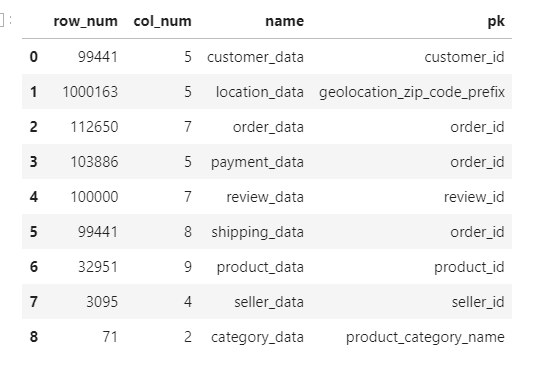

In [76]:
order_df['order_id'] = order_df['order_id'].astype(str)
shipping_df['order_id'] = shipping_df['order_id'].astype(str) #조인이 되는 형태는 다 같아야된다. 그래야 오류 안난다.
order_df = order_df.merge(shipping_df, how='left', on='order_id')

In [77]:
order_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


In [78]:
order_df['product_id'] = order_df['product_id'].astype(str)
category_df['product_id'] = category_df['product_id'].astype(str)
order_df = order_df.merge(category_df, how='left', on='product_id')
order_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-20 23:43:48,2017-09-29 00:00:00,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2017-05-12 16:04:24,2017-05-15 00:00:00,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018-01-22 13:19:16,2018-02-05 00:00:00,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,2018-08-14 13:32:39,2018-08-20 00:00:00,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,2017-03-01 16:42:31,2017-03-17 00:00:00,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [79]:
order_df['customer_id'] = order_df['customer_id'].astype(str)
user_df['customer_id'] = user_df['customer_id'].astype(str)
order_df = order_df.merge(user_df, how='left', on='customer_id')
order_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,598.0,4.0,650.0,28.0,9.0,14.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,239.0,2.0,30000.0,50.0,30.0,40.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,695.0,2.0,3050.0,33.0,13.0,33.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,480.0,1.0,200.0,16.0,10.0,15.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,409.0,1.0,3750.0,35.0,40.0,30.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


----
#### *필요한 Columns 정리*

##### <다음주 실습 내용>
1. 시간대별 주문 데이터 분석
    - 시간대별 주문 분석 -> `order_purchase_timestamp`
    - 시간대별 주문 지역 분석 -> `order_purchase_timestamp, customer_city`
2. 주문 상품의 카테고리 분석
    - 주문 데이터에서 상품의 카테고리 비율 분석하기 -> `product_category_name`
    - 시간대별 주문 상품 카테고리 분석 (ex. 밤에 많이 사는 상품군) -> `order_purchase_timestamp, product_category_name`
    - 일자/요일별 주문 상품 카테고리 분석 (ex. 일요일에 많이 사는 상품군) -> `order_purchase_timestamp, product_category_name`
3. 배송 데이터 분석
    - 평균 배송 시간 분석 -> `order_purchase_timestamp, order_delivered_customer_date`
    - 지역에 따른 배송 시간 분석 -> `customer_city, order_purchase_timestamp, order_delivered_customer_date`
    - 예상 배송일과 실제 배송일간의 차이 분석 -> `order_estimated_delivery_date, order_delivered_customer_date`
    - 상품 카테고리별 평균 배송 시간 분석 -> `order_purchase_timestamp, order_delivered_customer_date, product_category_name`

In [80]:
order_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state'],
      dtype='object')

In [81]:
anal_columns = ['order_id', 'product_id', 'customer_id',  # 기본 id 정보들, join키들은 다 살려야한다.
                'order_purchase_timestamp', 'customer_city', 'product_category_name', 
                'order_delivered_customer_date', 'order_estimated_delivery_date',
                'order_status',  # 필터링에 사용되는 정보
                'price']  # 시각화용 정보
order_df = order_df[anal_columns]

In [82]:
order_df.head()

,order_id,product_id,customer_id,order_purchase_timestamp,customer_city,product_category_name,order_delivered_customer_date,order_estimated_delivery_date,order_status,price
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,campos dos goytacazes,cool_stuff,2017-09-20 23:43:48,2017-09-29 00:00:00,delivered,58.90
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,santa fe do sul,pet_shop,2017-05-12 16:04:24,2017-05-15 00:00:00,delivered,239.90
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,para de minas,moveis_decoracao,2018-01-22 13:19:16,2018-02-05 00:00:00,delivered,199.00
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,atibaia,perfumaria,2018-08-14 13:32:39,2018-08-20 00:00:00,delivered,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,varzea paulista,ferramentas_jardim,2017-03-01 16:42:31,2017-03-17 00:00:00,delivered,199.90


----
### [결측 데이터 처리하기]

In [83]:
order_df.shape

(112650, 10)

In [84]:
order_df.isnull().sum() #없애도 되는지 체크!

order_id                            0
product_id                          0
customer_id                         0
order_purchase_timestamp            0
customer_city                       0
product_category_name            1603
order_delivered_customer_date    2454
order_estimated_delivery_date       0
order_status                        0
price                               0
dtype: int64

In [85]:
order_df['product_category_name'].value_counts()

cama_mesa_banho                  11115
beleza_saude                      9670
esporte_lazer                     8641
moveis_decoracao                  8334
informatica_acessorios            7827
                                 ...  
la_cuisine                          14
cds_dvds_musicais                   14
pc_gamer                             9
fashion_roupa_infanto_juvenil        8
seguros_e_servicos                   2
Name: product_category_name, Length: 73, dtype: int64

In [85]:
order_df.dropna().isnull().sum()

order_id                         0
product_id                       0
customer_id                      0
order_purchase_timestamp         0
customer_city                    0
product_category_name            0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_status                     0
price                            0
dtype: int64

In [86]:
order_df = order_df.dropna()
order_df.shape

(108659, 10)

In [87]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108659 entries, 0 to 112649
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       108659 non-null  object 
 1   product_id                     108659 non-null  object 
 2   customer_id                    108659 non-null  object 
 3   order_purchase_timestamp       108659 non-null  object 
 4   customer_city                  108659 non-null  object 
 5   product_category_name          108659 non-null  object 
 6   order_delivered_customer_date  108659 non-null  object 
 7   order_estimated_delivery_date  108659 non-null  object 
 8   order_status                   108659 non-null  object 
 9   price                          108659 non-null  float64
dtypes: float64(1), object(9)
memory usage: 9.1+ MB


----

# 3. 데이터 시각화 연습

----
### [scatter plot]

In [88]:
olist_products_dataset.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

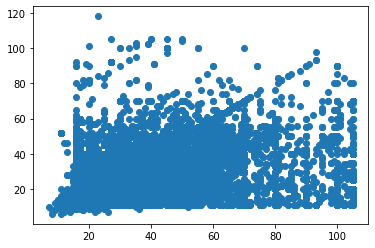

In [89]:
plt.scatter(olist_products_dataset['product_length_cm'], olist_products_dataset['product_width_cm'])

In [90]:
import seaborn as sns

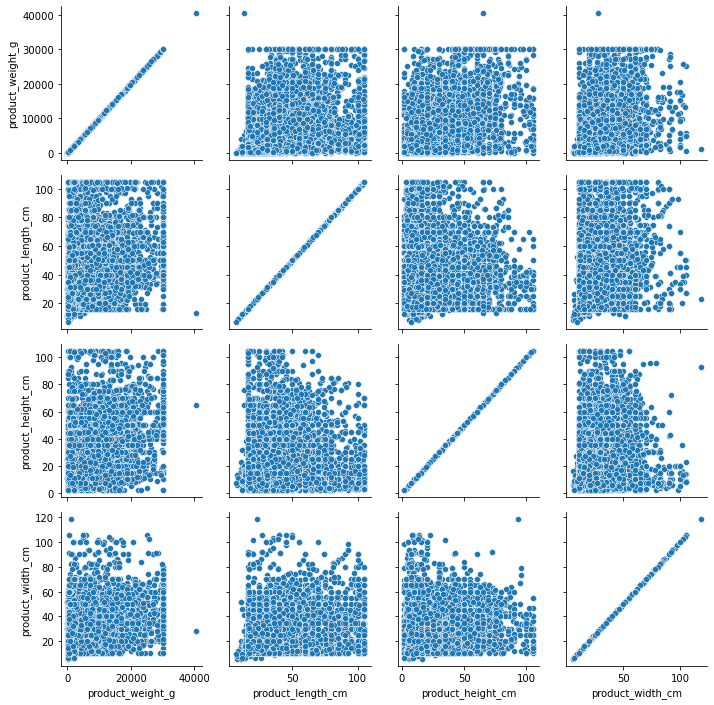

In [91]:
scatter_df = olist_products_dataset[['product_weight_g', 'product_length_cm', 'product_height_cm','product_width_cm']]
g = sns.PairGrid(scatter_df) #모든 조합의 scatteplot 구하기
g.map(sns.scatterplot)

----
### [box plot]

In [92]:
order_df.head()

,order_id,product_id,customer_id,order_purchase_timestamp,customer_city,product_category_name,order_delivered_customer_date,order_estimated_delivery_date,order_status,price
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,campos dos goytacazes,cool_stuff,2017-09-20 23:43:48,2017-09-29 00:00:00,delivered,58.90
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,santa fe do sul,pet_shop,2017-05-12 16:04:24,2017-05-15 00:00:00,delivered,239.90
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,para de minas,moveis_decoracao,2018-01-22 13:19:16,2018-02-05 00:00:00,delivered,199.00
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,atibaia,perfumaria,2018-08-14 13:32:39,2018-08-20 00:00:00,delivered,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,varzea paulista,ferramentas_jardim,2017-03-01 16:42:31,2017-03-17 00:00:00,delivered,199.90


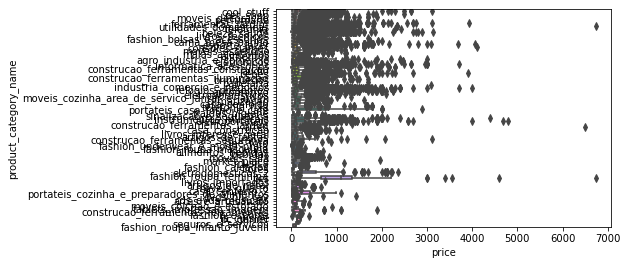

In [93]:
sns.boxplot(y=order_df['product_category_name'], x=order_df['price'] );
plt.show()

In [94]:
order_df['product_category_name'].value_counts()[:10]

cama_mesa_banho           10953
beleza_saude               9467
esporte_lazer              8431
moveis_decoracao           8160
informatica_acessorios     7643
utilidades_domesticas      6795
relogios_presentes         5857
telefonia                  4430
ferramentas_jardim         4268
automotivo                 4139
Name: product_category_name, dtype: int64

In [95]:
top10_category = order_df['product_category_name'].value_counts()[:10].index.tolist()

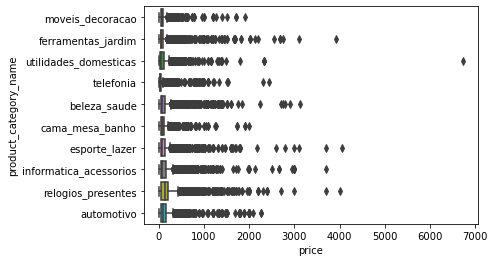

In [98]:
top10_category_order_df=order_df[order_df['product_category_name'].isin(top10_category)]
sns.boxplot(y=top10_category_order_df['product_category_name'],x=top10_category_order_df["price"])
plt.show()

In [99]:
product_category_name_translation = pd.read_csv(data_dir + "product_category_name_translation.csv")
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [100]:
top10_category_order_df = top10_category_order_df.merge(product_category_name_translation, how='left', on='product_category_name')

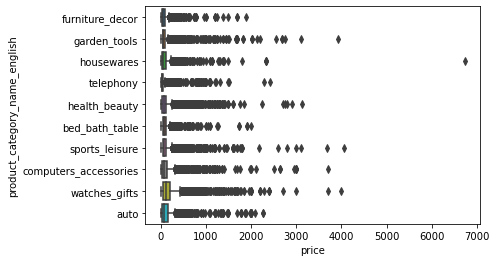

In [101]:
sns.boxplot(y=top10_category_order_df['product_category_name_english'], x=top10_category_order_df['price'] );
plt.show()

----
### [hist plot]

In [99]:
order_df['price'].describe()

count    108659.000000
mean        120.102048
std         182.112949
min           0.850000
25%          39.900000
50%          74.900000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

<AxesSubplot:>

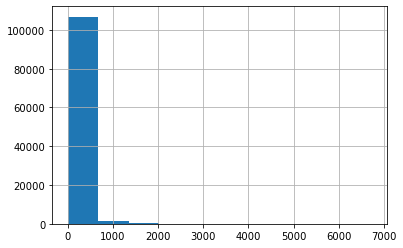

In [100]:
order_df['price'].hist()

<AxesSubplot:>

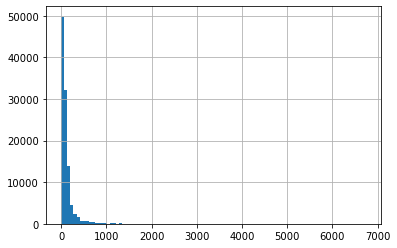

In [104]:
order_df['price'].hist(bins=100)


<AxesSubplot:>

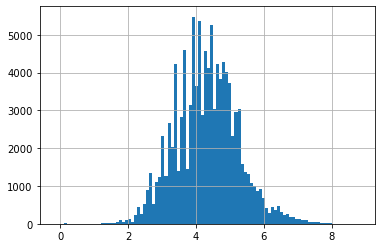

In [105]:
np.log(order_df['price']).hist(bins=100)

array([[<AxesSubplot:title={'center':'product_weight_g'}>,
        <AxesSubplot:title={'center':'product_length_cm'}>],
       [<AxesSubplot:title={'center':'product_height_cm'}>,
        <AxesSubplot:title={'center':'product_width_cm'}>]], dtype=object)

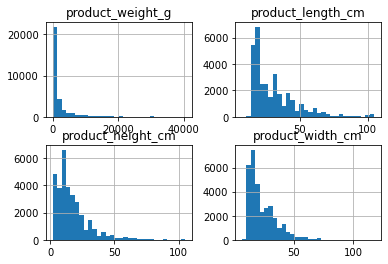

In [105]:
olist_products_dataset[['product_weight_g', 'product_length_cm', 'product_height_cm','product_width_cm']].hist(bins=30)

----
### [heatmap plot]

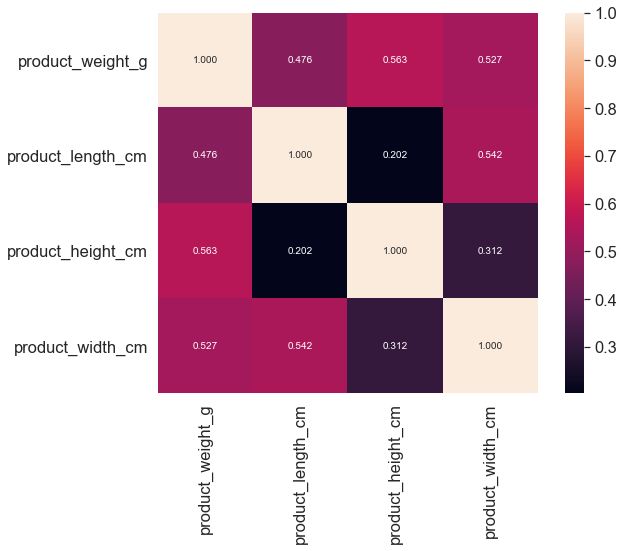

In [114]:
import seaborn as sns

# 피처간의 상관계수 행렬
corr = olist_products_dataset[['product_weight_g', 'product_length_cm', 'product_height_cm','product_width_cm']].corr(method='pearson')
show_cols = ['product_weight_g', 'product_length_cm', 'product_height_cm','product_width_cm']

# corr 행렬 히트맵을 시각화
plt.rcParams['figure.figsize'] = [10, 8]
plt.rc('font', family='Malgun Gothic')
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
             annot=True,
            square=True,
            fmt='.3f',
            annot_kws={'size': 10},
            yticklabels=show_cols,
            xticklabels=show_cols)

plt.tight_layout()
plt.show()

Copyright (c) 2021 [윤기태]

https://github.com/yoonkt200/learning-spoons-nano-degree

[MIT License](https://github.com/yoonkt200/learning-spoons-nano-degree/blob/master/LICENSE.txt)